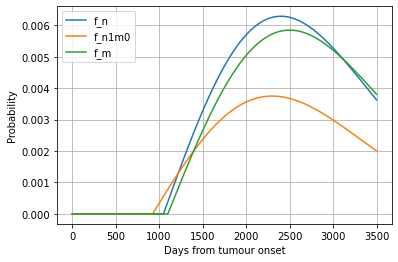

In [1]:
# importing numpy, scipy, matplotlib and sympy libraries
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import sympy as sp
from sympy import erfc
from sympy.integrals.rubi.rubimain import rubi_integrate
from sympy.abc import s,t


sigma1 = 1350;
sigma2 = 1375;
sigma3 = 1400;

stab_fact1 = 14;
stab_fact2 = 8.5;
stab_fact3 = 13.5;

# This pdfs closely resembles the rayleigh pdf

fn_n = stab_fact1*((t / (sigma1 ** 2)) * sp.exp(-((t ** 2) / (2 * (sigma1 ** 2)))));
fn_m = stab_fact3*((t / (sigma3 ** 2)) * sp.exp(-((t ** 2) / (2 * (sigma3 ** 2)))));
fn_n1m0 = stab_fact2*((t / (sigma2 ** 2)) * sp.exp(-((t ** 2) / (2 * (sigma2 ** 2)))));

# Arranging things as per the requirement
x = np.arange(1,3500,1)
y1 = [fn_n.subs({t:x1}) for x1 in range(1,3500,1)]
y = np.linspace(0,0,1050).tolist() + y1[0:3500-1051]
z1 = [fn_n1m0.subs({t:x2}) for x2 in range(1,3500,1)]
z = np.linspace(0,0,925).tolist() + z1[0:3500-926]
w1 = [fn_m.subs({t:x3}) for x3 in range(1,3500,1)]
w = np.linspace(0,0,1100).tolist() + w1[0:3500-1101]

# Plotting the necessary things
plt.plot(x,y)
plt.plot(x,z)
plt.plot(x,w)
plt.grid(True)
plt.xlabel("Days from tumour onset")
plt.ylabel("Probability")
plt.legend(['f_n','f_n1m0','f_m'])

plt.show()


In [2]:
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import math

# Function for finding frequency distribution of given data of tumor size

def findFreqDistribution(fileName, sheetName):
    loc = (fileName)
    wb = xlrd.open_workbook(loc) #Accessing data files (excel sheets) with file name fileName
    newData = wb.sheet_by_name(sheetName) #Accessing data from worksheet sheetName

    tumorDist = list() 
    uppLimit = 1.0
    freq = 0
    totalPats = 0  #total number of patients
    
    # Computing frequencies of a specific tumor size range and returning the data
    for i in range(1,newData.nrows):  
        if float(newData.cell_value(i,0)) < uppLimit and float(newData.cell_value(i,0)) >= (uppLimit - 1.0):
            freq += int(newData.cell_value(i,1))
        else:
            uppLimit += 1.0
            tumorDist.append(freq)
            totalPats += freq
            freq = int(newData.cell_value(i,1))
    tumorDist.append(freq)
    totalPats += freq

    for i in range(len(tumorDist)):
        tumorDist[i] = (float(tumorDist[i]))/(float(totalPats))
    return tumorDist  #returning frequency distribution of given tumor size data

In [3]:
#Range of tumor sizes of patients
tumorRanges = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '>20']

#FOR N0, M0 STAGED PATIENTS
tumorDistN0M0 = findFreqDistribution("SEER 2000-2003.xls", '1a_N0_M0')

#FOR NX, M0 STAGED PATIENTS
tumorDistNxM0 = findFreqDistribution("SEER 2000-2003.xls", '1a_Nx_M0')

In [4]:
import numpy as np
import sympy as sy
import math
import random


loc=("SEER 2000-2003.xls")
wb = xlrd.open_workbook(loc)
newData = wb.sheet_by_name('1a_Model_Nx_M0')
prValuesModelNxM0 = list()
alpha = 0.0001
w1 = 100
sni = 0  #Size of primary tumor at the initiation of nodal metastasis
s = sy.Symbol('s')
Dn = 1-(sy.exp((-(alpha/2)*((s-sni)**2)) - (w1*(s-sni))))
Dnvalues = list()
for i in range(1,newData.nrows):
    Dnvalues.append(Dn.subs(s,i))
    a = random.uniform(0,1)
    if a <= Dnvalues[i-1]:
        prValuesModelNxM0.append(float(newData.cell_value(i,1)) + ((Dnvalues[i-1]-Dnvalues[i-2])*alpha))

In [5]:
import numpy as np
import sympy as sy
import math
import random

loc=("SEER 2000-2003.xls")
wb = xlrd.open_workbook(loc)
newData = wb.sheet_by_name('1a_Model_N0_M0')
prValuesModelN0M0 = list()
alpha = 0.0001
w0 = 150
sp = 0 #size of primary tumor
s = sy.Symbol('s')
Dp = 1-(sy.exp((-(alpha/2)*((s-sp)**2)) - (w0*(s-sp))))
Dpvalues = list()
for i in range(1,newData.nrows):
    Dpvalues.append(Dp.subs(s,i))
    a = random.uniform(0,1)
    if a <= Dpvalues[i-1]:
        prValuesModelN0M0.append(float(newData.cell_value(i,1)) + ((Dpvalues[i-1]-Dpvalues[i-2])*alpha))
    

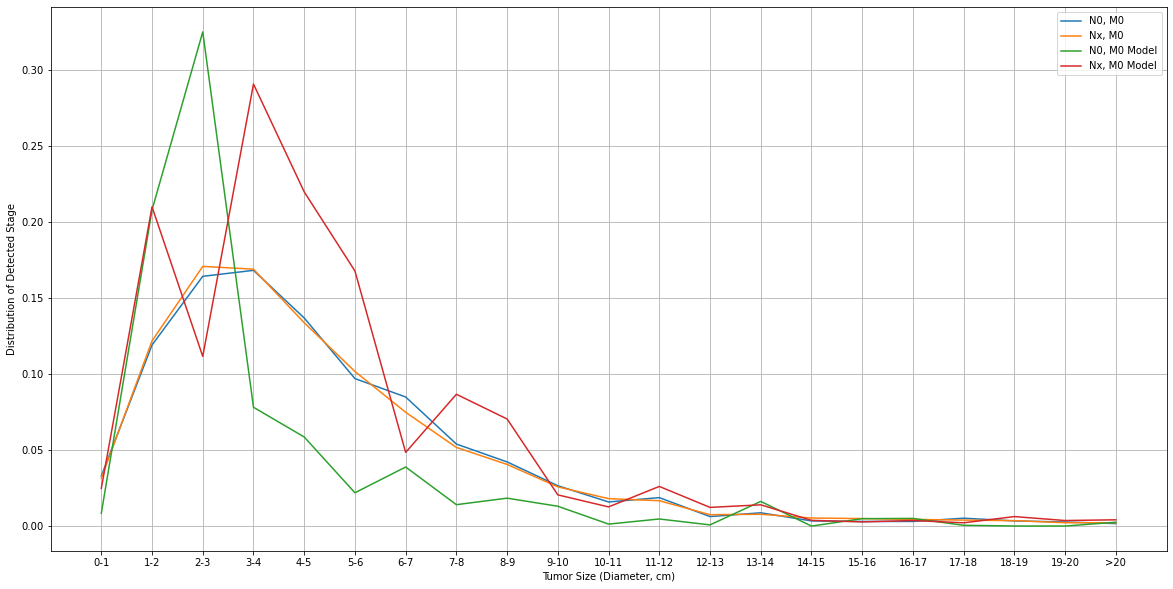

In [6]:
#REPRODUCING FIGURE 2(a)
plt.figure(figsize=(20,10))
plt.xlabel('Tumor Size (Diameter, cm)')
plt.ylabel('Distribution of Detected Stage')
plt.plot(tumorRanges, tumorDistN0M0) #plotting line chart N0,M0
plt.plot(tumorRanges, tumorDistNxM0) #plotting line chart Nx,M0
plt.plot(tumorRanges, prValuesModelN0M0) #plotting line chart N0,M0 based on modelled data
plt.plot(tumorRanges, prValuesModelNxM0) #plotting line chart Nx,M0 based on modelled data
plt.legend(['N0, M0', 'Nx, M0', 'N0, M0 Model', 'Nx, M0 Model'])
plt.grid()

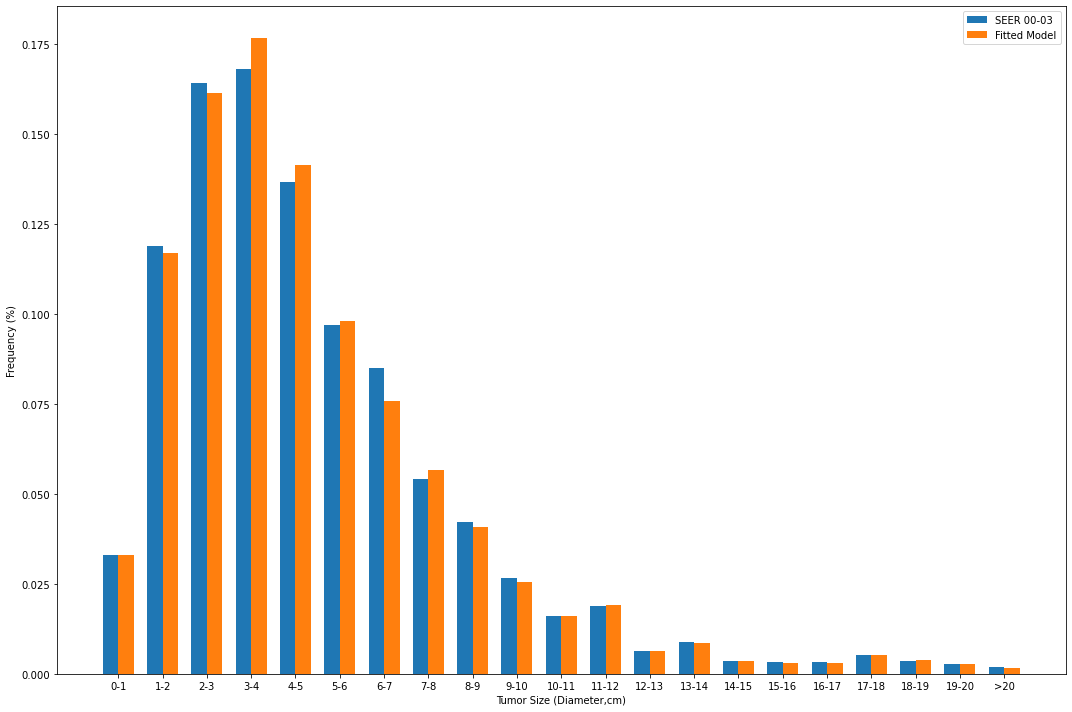

In [7]:
#Reproducing Graph 2(b)

import random
tumorDistAllStages = findFreqDistribution("SEER 2000-2003.xls", '1b_SEER') #Computing frequency distribution of all stage patients based on given data SEER 2000-03
loc=("SEER 2000-2003.xls") 
wb = xlrd.open_workbook(loc)
modellingData = wb.sheet_by_name('1b_Modelling')
totalPats = 0
for i in range(1,modellingData.nrows):
    totalPats += modellingData.cell_value(i,1)
tumorDistAllStagesMod = list()
for i in range(1,modellingData.nrows):    #computing frequequency distribution of all stage patients through modelling of data 
    a = random.uniform(0,1)
    if (a <= (Dpvalues[i-1] + Dnvalues[i-1])):
        tumorDistAllStagesMod.append(modellingData.cell_value(i,1))
        tumorDistAllStagesMod[i-1] = (float(tumorDistAllStagesMod[i-1])/float(totalPats)) + ((Dpvalues[i-1] - Dpvalues[i-2] + Dnvalues[i-1] - Dnvalues[i-2]) * alpha)
y= tumorDistAllStages
y1 = tumorDistAllStagesMod
width=0.35
xlen=np.arange(len(tumorRanges))
fig, ax=plt.subplots(figsize=(15,10))
plot01=ax.bar(xlen-width/2,y,width,label='SEER 00-03')  #plotting frequency distribution of all stage patients based on given data SEER 2000-03
plot02=ax.bar(xlen+width/2,y1,width,label='Fitted Model') #plotting frequency distribution of fitted model data
ax.set_ylabel('Frequency (%)')
ax.set_xlabel('Tumor Size (Diameter,cm)')
fig.tight_layout()
ax.set_xticks(xlen)
ax.set_xticklabels(tumorRanges)
ax.legend()
plt.show()

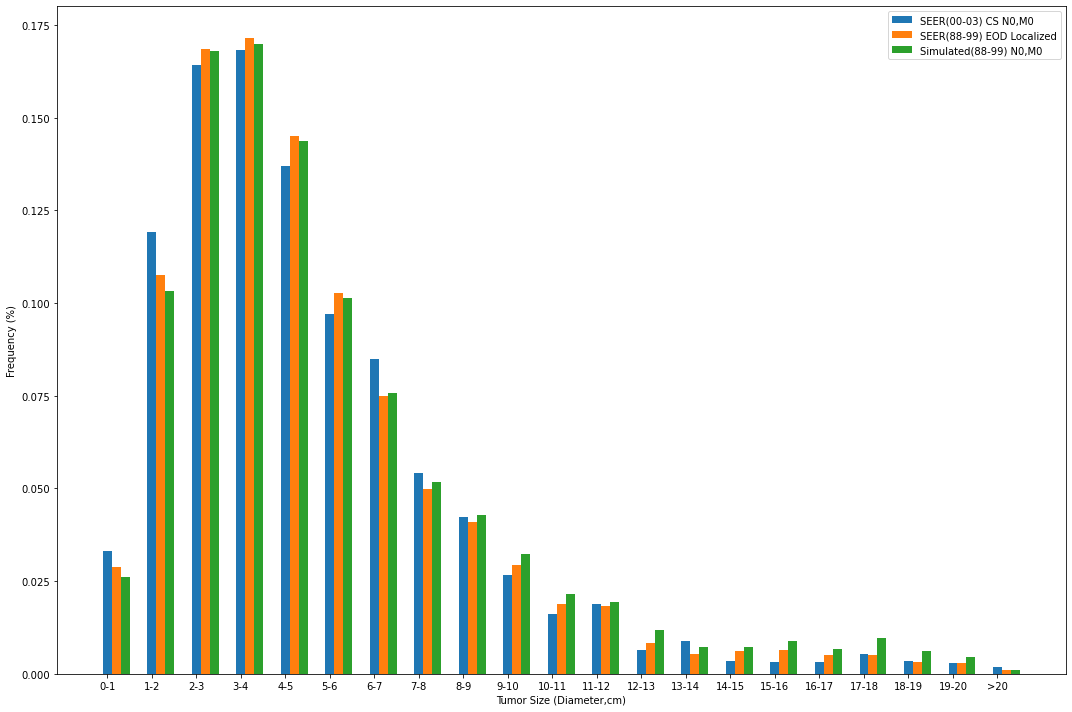

In [8]:
#Producing Fig 3(a)

#Accessing Data from excel sheets (1988-1999) for Localized
tumorDistN0M0_Old = findFreqDistribution("SEER 1988-1999.xls", 'N0M0_Count')
tumorDistN0M0_Old_Sims = list()
loc=("SEER 1988-1999.xls")
wb = xlrd.open_workbook(loc)
modellingData = wb.sheet_by_name('N0M0_Model')
alpha = 0.0001
w0 = 150
sp = 0
s = sy.Symbol('s')
Dp = 1-(sy.exp((-(alpha/2)*((s-sp)**2)) - (w0*(s-sp))))
Dpvalues = list()
#Simulating SEER 1988-99 Data based upon the model for patients of N0,M0 patients
for i in range(1,modellingData.nrows):
    Dpvalues.append(Dn.subs(s,i))
    a = random.uniform(0,1)
    if a <= Dpvalues[i-1]:
        tumorDistN0M0_Old_Sims.append(float(modellingData.cell_value(i,1)) + ((Dpvalues[i-1]-Dpvalues[i-2])*alpha))

y = tumorDistN0M0 #From 2000-2003 Data file N0,M0 stage data
y1 = tumorDistN0M0_Old 
y2 = tumorDistN0M0_Old_Sims

width=0.2
xlen=np.arange(len(tumorRanges))
fig, ax=plt.subplots(figsize=(15,10))
plot01=ax.bar(xlen,y,width,label='SEER(00-03) CS N0,M0')  #Plotting SEER 2000-03 frequency distribution for N0,M0 stage patients
plot02=ax.bar(xlen+width,y1,width,label='SEER(88-99) EOD Localized') #Plotting SEER 1988-99 frequency distribution for Localized stage patients
plot03=ax.bar(xlen+2*width,y2,width,label='Simulated(88-99) N0,M0') #Plotting simulated data of SEER 1988-99 patients with N0,M0 stage
ax.set_ylabel('Frequency (%)')
ax.set_xlabel('Tumor Size (Diameter,cm)')
fig.tight_layout()
ax.set_xticks(xlen)
ax.set_xticklabels(tumorRanges)
ax.legend()
plt.show()

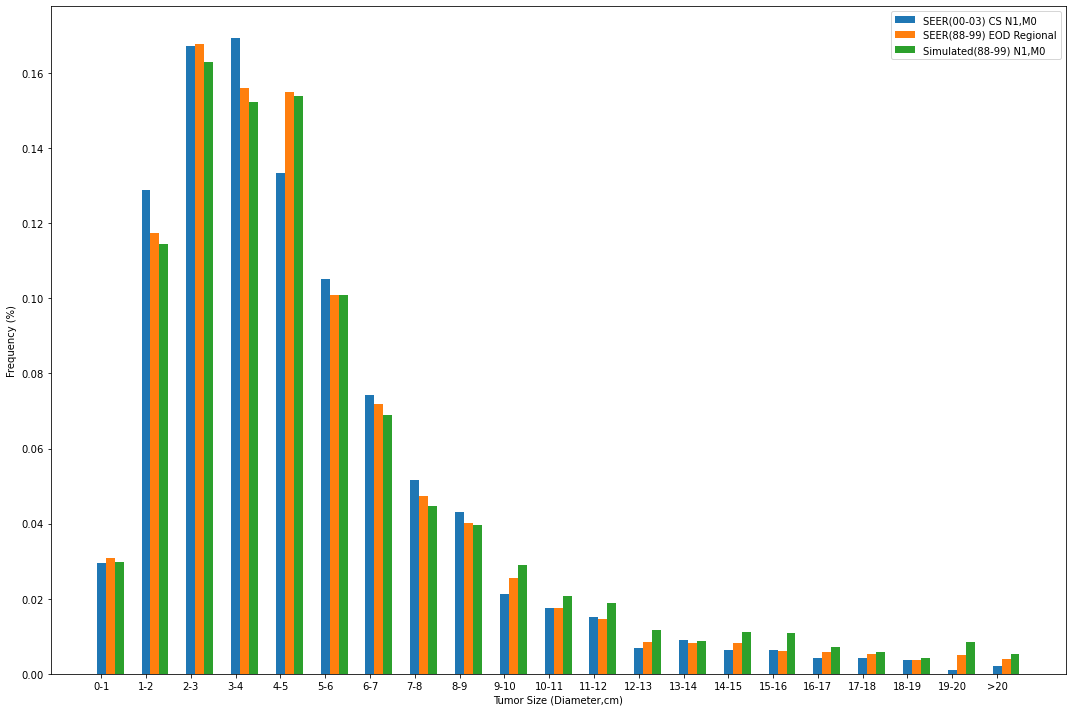

In [9]:
#Producing Fig 3(b)

#Accessing Data from excel sheets (1988-1999) for Regional
tumorDistN1M0_Old = findFreqDistribution("SEER 1988-1999.xls", 'N1M0_Count')

#Accessing Data from excel sheets (2000-2003) for N1,M0
tumorDistN1M0 = findFreqDistribution("SEER 2000-2003.xls", 'N1M0_Count')

tumorDistN1M0_Old_Sims = list()
loc=("SEER 1988-1999.xls")
wb = xlrd.open_workbook(loc)
modellingData = wb.sheet_by_name('N1M0_Model')
alpha = 0.0002
w1 = 125
sn = 0
s = sy.Symbol('s')
Dn = 1-(sy.exp((-(alpha/2)*((s-sn)**2)) - (w1*(s-sn))))
Dnvalues = list()
#Simulating SEER 1988-99 Data based upon the model for patients of N1,M0 patients
for i in range(1,modellingData.nrows):
    Dnvalues.append(Dn.subs(s,i))
    a = random.uniform(0,1)
    if a <= Dnvalues[i-1]:
        tumorDistN1M0_Old_Sims.append(float(modellingData.cell_value(i,1)) + ((Dnvalues[i-1]-Dnvalues[i-2])*alpha))

y =  tumorDistN1M0 #From 2000-2003 Data file
y1 = tumorDistN1M0_Old
y2 = tumorDistN1M0_Old_Sims
width=0.2
xlen=np.arange(len(tumorRanges))
fig, ax=plt.subplots(figsize=(15,10))
plot01=ax.bar(xlen,y,width,label='SEER(00-03) CS N1,M0') #Plotting SEER 2000-03 frequency distribution for N1,M0 stage patients
plot02=ax.bar(xlen+width,y1,width,label='SEER(88-99) EOD Regional') #Plotting SEER 1988-99 frequency distribution for Regional stage patients
plot03=ax.bar(xlen+2*width,y2,width,label='Simulated(88-99) N1,M0') #Plotting simulated data of SEER 1988-99 patients with N1,M0 stage
ax.set_ylabel('Frequency (%)')
ax.set_xlabel('Tumor Size (Diameter,cm)')
fig.tight_layout()
ax.set_xticks(xlen)
ax.set_xticklabels(tumorRanges)
ax.legend()
plt.show()